# 금융시장의 빅데이터 분석

4조 20170632 이혜인, 20180491 김민지, 20180565 안재연<br> <br> 

# 1) feature 선정/ 자료수집

### 뉴스 크롤링

In [ ]:
from requests import get
from bs4 import BeautifulSoup
from re import compile
import csv

f = open('naver_news.csv', 'w', encoding="utf-8-sig", newline='')
wr = csv.writer(f)
wr.writerow(['제목', '날짜', '본문'])

for i in range(1, 201) :

    response = get("https://finance.naver.com/news/news_search.nhn?rcdate=1&q=%C0%FC%B1%E2%C2%F7&x=0&y=0&sm=title.basic&pd=4&stDateStart=2021-01-04&stDateEnd=2021-04-30&page="+str(i))

    if response.status_code == 200:
        bsObject = BeautifulSoup(response.content.decode('euc-kr','replace'), 'html.parser')

        newshref = bsObject.select('#contentarea_left > div.newsSchResult > dl > .articleSubject > a')

        for j in range(len(newshref)) : 
            href = "https://finance.naver.com" + newshref[j]['href']
            response_news = get(href)
            if response_news.status_code == 200:
                bs = BeautifulSoup(response_news.content.decode('euc-kr','replace'), 'html.parser')

                #제목
                newstitle = bs.select_one('div.article_info > h3').get_text().rstrip().lstrip()

                pat = compile('특징주')  #주가 관련 뉴스 제거
                index = pat.search(newstitle)
                if index : continue

                print(newstitle)

                #날짜
                newsdate = bs.select_one('span.article_date').get_text()

                #내용
                try : content = bs.select_one('div#content')
                except: 
                    print("bs.select error")
                    continue
                #텍스트 이외의 태그 제거
                for tag in content.find_all(True) :
                    if tag.name == 'br' or tag.name == 'b' : continue
                    tag.extract()
                content = content.get_text().lstrip().rstrip()

                #연합뉴스 포토 기사 제거
                pat = compile('연합뉴스')
                index = pat.search(content)
                if index : continue

                #기사 말머리 제거
                pat = compile('[\[【].{1,30}[\]】]')
                index = pat.search(content)
                if index and index.start() < 10 : content = content[index.end():].lstrip()
                
                #기자 정보 제거
                pat = compile('\..{1,20}(기자|특파원|교수|위원|매니저)')
                index = pat.search(content)
                if index : 
                    if not bs.select_one('div.vod_area') : content = content[:index.start()+1] #영상뉴스는 제외

                pat = compile('기자 = ')
                index = pat.search(content)
                if index : 
                    content = content[index.end():]

                #이메일 정보 제거
                pat = compile('(다\.).{1,50}@')
                index = pat.search(content)
                if index : 
                    content = content[:index.start()+2]
                
                #저작권 관련 제거
                pat =   compile('- Copyrights|저작권자|ⓒ')
                index = pat.search(content)
                if index : 
                   content = content[:index.start()]

                #짧은 내용의 기사 / html 구조가 다른 경우 제외
                if len(content) < 50 : continue

                wr.writerow([newstitle, newsdate, content])
                print('ok')
            else : 
                print(response_news.status_code)
    else : 
        print(response.status_code)

    print('success {} page'.format(i))

f.close()


쑥쑥 크는 전기차 시장···“2030년엔 10대 중 1대”
ok
1회 충전시 480km..폭스바겐 첫 고성능 전기차 나왔다
ok
전기차 배터리 업체들, 렌터카와 협업 잇따라
ok
LG엔솔-롯데렌탈, 전기차 특화 서비스 협력
ok
폭스바겐 "2030년까지 유럽 내 전기차 판매 비중 70% 목표"
ok
[기자수첩]소비자·제조사 괴롭히는 '이상한 전기차 보조금'
ok
배터리 실시간 관리하고 충전소도 늘어…전기차 시장 커진다
ok
SK이노·SK렌터카, 안전하고 오래 쓰는 전기차 배터리 솔루션 협업
ok
LG에너지솔루션-롯데렌탈, 전기차 배터리 사업 협력
ok
LG엔솔-롯데렌탈, 전기차 특화 서비스 협력 나선다(종합)
ok
SK이노·SK렌터카, '안전하게 오래 쓰는' 전기차 배터리 협업
ok
GM 2023년부터 멕시코에서도 전기차 생산 '10억달러 투자'
ok
폭스바겐 고성능 전기차 'ID.4 GTX' 공개…1회 충전 시 480km 주행
ok
LG에너지솔루션, 롯데렌터카와 전기차 배터리 서비스 협력
“현대차, 美서 전기차 생산 검토”
ok
LG에너지솔루션-롯데렌탈 ‘전기차 BaaS’ 협력
ok
전기차에 6배 많이 사용된다…구리, 10년만에 1만달러 돌파
ok
폴크스바겐, 첫 고성능 전기차 ‘ID.4 GTX’ 공개… “GTI 명맥 잇는다”
ok
폭스바겐 “2050년까지 탑소중립 실현…전기차 판매 확대”
폭스바겐, 첫 고성능 전기차 ID.4 GTX 공개
ok
success 1 page
SK이노-SK렌터카, 전기차 배터리 '안전하게 오래쓰는 배터리 솔루션' 공동 추진
ok
LG에너지솔루션-롯데렌탈, 전기차 BaaS 사업 협력
ok
LG에너지솔루션-롯데렌탈, 전기차 특화서비스 사업 협력 나선다
ok
LG엔솔-롯데렌탈, 전기차 특화 서비스 개발 나선다
ok
LG에너지솔루션·롯데렌탈, 전기차 배터리 사업 협력
ok
LG에너지솔루션, 롯데렌탈과 전기차 BaaS 사업 협력 나선다
ok
LG엔솔-롯데렌탈, 전기차 특화 서비스 협력 나선다
ok
LG엔솔-롯데렌탈, EV 렌터카 관련 MO

In [ ]:
from requests import get
from bs4 import BeautifulSoup
from re import compile
import csv

f = open('naver_news1.csv', 'w', encoding="utf-8-sig", newline='')
wr = csv.writer(f)
wr.writerow(['제목', '날짜', '본문'])

for i in range(1, 56) :

    response = get("https://finance.naver.com/news/news_search.nhn?rcdate=&q=%C0%FC%B1%E2%C2%F7&x=0&y=0&sm=title.basic&pd=4&stDateStart=2020-11-01&stDateEnd=2021-01-03&page="+str(i))

    if response.status_code == 200:
        bsObject = BeautifulSoup(response.content.decode('euc-kr','replace'), 'html.parser')

        newshref = bsObject.select('#contentarea_left > div.newsSchResult > dl > .articleSubject > a')

        for j in range(len(newshref)) : 
            href = "https://finance.naver.com" + newshref[j]['href']
            response_news = get(href)
            if response_news.status_code == 200:
                bs = BeautifulSoup(response_news.content.decode('euc-kr','replace'), 'html.parser')

                #제목
                newstitle = bs.select_one('div.article_info > h3').get_text().rstrip().lstrip()

                pat = compile('특징주')  #주가 관련 뉴스 제거
                index = pat.search(newstitle)
                if index : continue

                print(newstitle)

                #날짜
                newsdate = bs.select_one('span.article_date').get_text()

                #내용
                try : content = bs.select_one('div#content')
                except: 
                    print("bs.select error")
                    continue
                #텍스트 이외의 태그 제거
                for tag in content.find_all(True) :
                    if tag.name == 'br' or tag.name == 'b' : continue
                    tag.extract()
                content = content.get_text().lstrip().rstrip()

                #연합뉴스 포토 기사 제거
                pat = compile('연합뉴스')
                index = pat.search(content)
                if index : continue

                #기사 말머리 제거
                pat = compile('[\[【].{1,30}[\]】]')
                index = pat.search(content)
                if index and index.start() < 10 : content = content[index.end():].lstrip()
                
                #기자 정보 제거
                pat = compile('\..{1,20}(기자|특파원|교수|위원|매니저)')
                index = pat.search(content)
                if index : 
                    if not bs.select_one('div.vod_area') : content = content[:index.start()+1] #영상뉴스는 제외

                pat = compile('기자 = ')
                index = pat.search(content)
                if index : 
                    content = content[index.end():]

                #이메일 정보 제거
                pat = compile('(다\.).{1,50}@')
                index = pat.search(content)
                if index : 
                    content = content[:index.start()+2]
                
                #저작권 관련 제거
                pat =   compile('- Copyrights|저작권자|ⓒ')
                index = pat.search(content)
                if index : 
                   content = content[:index.start()]

                #짧은 내용의 기사 / html 구조가 다른 경우 제외
                if len(content) < 50 : continue

                wr.writerow([newstitle, newsdate, content])
                print('ok')
            else : 
                print(response_news.status_code)
    else : 
        print(response.status_code)

    print('success {} page'.format(i))

f.close()


9000만원 넘는 고가 전기차 보조금 못 받는다
ok
테슬라 보조금, 절반 ‘뚝’…새해 바뀌는 전기차 지원
ok
"전기차도 주행거리 따라 세금내야"
ok
작년 테슬라 독주한 전기차 시장…새해 현대차 반격 나선다
ok
K배터리 "美 전기차 시장 잡아라" 공략 가속화
ok
마루 만드는 동화기업, 전기차 소재 '숨은 진주'
ok
테슬라 모델S·X 등 고가 전기차 보조금 못받는다
ok
올해는 ‘전기차 대중화’ 원년… 국산 vs 수입 한판승부 예고
ok
‘K-배터리’ 전기차 본격화 타고 2021년 날아오른다
ok
전기차 보조금, 1000만원→0원…테슬라 가격 내릴까
ok
속도내는 `배터리 코리아`…삼성·LG, 전기차 배터리로 돈 번다
ok
고가 전기차 테슬라 모델S 보조금 못받는다
ok
테슬라, 코로나에도 잘나갔다...전기차 50만대 최다판매 기록
ok
전기차 대중화 원년...국산-수입차 한판승부
ok
이제는 전기차 시대…현대모비스 성장궤도 본격화
ok
지난해 전기차 등 친환경차 수출 40% 증가
테슬라 “4분기 19만대 등 작년 전기차 50만대 인도”
ok
지난해 친환경차 수출 비중 사상 첫 10% 돌파…전기차 67%↑
ok
테슬라 모델3 사면 보조금 반토막? 2021 전기차 지원 정책
ok
새해 전기차 보조금 축소...차 회사엔 징벌적 손해배상 도입
ok
success 1 page
테슬라, 작년 전기차 50만대 인도…4분기 '역대 최다'
기다리던 전기차 시대…현대모비스 도약 신호탄
ok
[박종훈의 경제한방] 전기차·자율주행은 시작…더 큰 혁명이 온다!
ok
[판 커진 전기차…누가 승자?] 전기차, 패권 누가 잡나?
ok
[판 커진 전기차…누가 승자?] 현대차, 전기차 선점 ‘잰걸음’
ok
[판 커진 전기차…누가 승자?] 전기차 시대, LG 구광모의 출사표
ok
[취재파일] 판 커진 전기차…누가 승자?
ok
작년 친환경차 판매 58% 늘었다…하이브리드·전기차 껑충
ok
남양주시, 전기차가 수시로 쓰레기 치우는 마을 운영
전기차 출고후 보조금 미신청…법원 "제조사 60

### 주말 / 공휴일 / 마감장 조정

In [ ]:
#주말 / 공휴일 / 마감장 조정
def rearrange(df) :
    date = datetime.datetime.strptime(df['date'], "%Y-%m-%d")
    
    #공휴일
    if date in [datetime.datetime(2020, 12, 31), datetime.datetime(2021, 2, 11)] : 
        return str(date + datetime.timedelta(days=4))[:10]
    elif date in [datetime.datetime(2020, 12, 25), datetime.datetime(2021, 1, 1), datetime.datetime(2021, 2, 12)] :
        return str(date + datetime.timedelta(days=3))[:10]
    elif date == datetime.datetime(2021, 3, 1) : 
        return str(date + datetime.timedelta(days=1))[:10]
    #주말
    elif date.weekday() == 6 :  #일요일
        if date == datetime.datetime(2021, 2, 28) : return str(date + datetime.timedelta(days=2))[:10]
        else : return str(date + datetime.timedelta(days=1))[:10]
    elif date.weekday() == 5 : #토요일
        if date == datetime.datetime(2021, 2, 27) : return str(date + datetime.timedelta(days=3))[:10]
        else : return str(date + datetime.timedelta(days=2))[:10]
    #장 마감
    else : 
        if int(df['time'].split(':')[0]) >= 16 or (int(df['time'].split(':')[0]) == 15 and int(df['time'].split(':')[1]) >= 30) :
            if date in [datetime.datetime(2020, 12, 24), datetime.datetime(2021, 2, 26)] :
                return str(date + datetime.timedelta(days=4))[:10]
            elif date in [datetime.datetime(2020, 12, 30), datetime.datetime(2021, 2, 10)] : 
                return str(date + datetime.timedelta(days=5))[:10]
            elif date.weekday() == 4 : return str(date + datetime.timedelta(days=3))[:10] #금요일
            else : return str(date + datetime.timedelta(days=1))[:10]
    return df['date']

data['date'] = data.apply(rearrange, axis=1)
data

,title,date,time,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,쑥쑥 크는 전기차 시장···“2030년엔 10대 중 1대”,2021-05-03,17:44,오는 2030년이면 전 세계 자동차 10대 중 1대는 전기차가 될 것이라는 전망이 ...,NaN,NaN,NaN,NaN,NaN,NaN
1,1회 충전시 480km..폭스바겐 첫 고성능 전기차 나왔다,2021-05-03,17:32,폭스바겐은 지난 28일(현지시간) 독일 베를린에 있는 템펠호프 공항 항공기 격납고에...,NaN,NaN,NaN,NaN,NaN,NaN
2,"전기차 배터리 업체들, 렌터카와 협업 잇따라",2021-05-03,17:31,배터리 업체와 렌터카 업체가 사업 시너지 효과를 내기 위한 협력 모델을 선보였다.3...,NaN,NaN,NaN,NaN,NaN,NaN
3,"LG엔솔-롯데렌탈, 전기차 특화 서비스 협력",2021-05-03,17:02,LG에너지솔루션과 롯데렌터카를 보유한 롯데렌탈이 전기차 특화 서비스 공동 개발을 위...,NaN,NaN,NaN,NaN,NaN,NaN
4,폭스바겐 2030년까지 유럽 내 전기차 판매 비중 70% 목표,2021-05-03,15:34,"폭스바겐은 독일 현지 시각으로 지난 28일, 디지털 월드 프리미어를 통해 폭스바겐의...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4293,"전기차 전용 정비업체, 등록기준 완화된다",2020-11-02,11:02,전기차 전용 정비업체에 대한 시설·장비 등 등록 기준이 완화된다.국토교통부는 제7회...,NaN,NaN,NaN,NaN,NaN,NaN
4294,"전기차 전용 정비업체, 시설·장비 등록기준 완화된다",2020-11-02,11:00,국토교통부는 규제혁신심의위원회를 열고 전기차 전용 정비업체 등록기준 완화 등 총 1...,NaN,NaN,NaN,NaN,NaN,NaN
4295,"전기차 전용 정비업체, 불필요 시설 없어도 된다…등록기준 완화",2020-11-02,11:00,정부가 전기차 전용 정비업체의 등록기준을 완화하기로 했다. 배출가스 측정기 등 불필...,NaN,NaN,NaN,NaN,NaN,NaN
4296,전기차 보조금 '하후상박'…테슬라 비싸지고 코나는 '반값',2020-11-02,8:57,"[머니투데이 세종=안재용 기자, 박경담 기자, 주명호 기자] [배터리 리스로 구매비...",NaN,NaN,NaN,NaN,NaN,NaN


## 일별/종목별 뉴스 갯수 추출

In [ ]:
# index를 datetime 객체로 설정
data_tmp=data[['date','title']]
data_tmp=data_tmp.set_index(['date'])
data_tmp=data_tmp.sort_index()
data_tmp

,title
date,
2020-11-02,"전기차는 히터 틀면 춥다더라' 묻는 이들에게…이봐, 해봤어?"
2020-11-02,"신보, 현대 전기차 협력기업에 220억 보증 지원"
2020-11-02,"메르세데스-벤츠, 더 뉴 EQC 보조금 지급 연장…전기차 확대 위해"
2020-11-02,"현대차 전기차 협력기업, 220억원 규모 보증 지원받는다"
2020-11-02,"신보, 현대차 전기차 협력기업에 220억 규모 보증 지원"
...,...
2021-05-03,폭스바겐 2030년까지 유럽 내 전기차 판매 비중 70% 목표
2021-05-03,"LG엔솔-롯데렌탈, 전기차 특화 서비스 협력"
2021-05-03,"전기차 배터리 업체들, 렌터카와 협업 잇따라"


In [ ]:
data_stack=data_tmp.stack()
data_stack

date             
2020-11-02  title        전기차는 히터 틀면 춥다더라' 묻는 이들에게…이봐, 해봤어?
            title              신보, 현대 전기차 협력기업에 220억 보증 지원
            title    메르세데스-벤츠, 더 뉴 EQC 보조금 지급 연장…전기차 확대 위해
            title          현대차 전기차 협력기업, 220억원 규모 보증 지원받는다
            title          신보, 현대차 전기차 협력기업에 220억 규모 보증 지원
                                     ...                  
2021-05-03  title       폭스바겐 2030년까지 유럽 내 전기차 판매 비중 70% 목표
            title                 LG엔솔-롯데렌탈, 전기차 특화 서비스 협력
            title                 전기차 배터리 업체들, 렌터카와 협업 잇따라
            title         1회 충전시 480km..폭스바겐 첫 고성능 전기차 나왔다
            title         쑥쑥 크는 전기차 시장···“2030년엔 10대 중 1대”
Length: 4298, dtype: object

In [ ]:
date_index=data_tmp.index
date_index=date_index.drop_duplicates()
date_index

Index(['2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
       '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
       ...
       '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-26',
       '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03'],
      dtype='object', name='date', length=125)

In [ ]:
len(data_stack)

4298

In [ ]:
len(date_index)

125

In [ ]:
# 일별 관련 뉴스 갯수
news_count = {'hyundai' : [], 'kia' : [], 'lg' : [], 'samsung' : [], 'sk' : [], 'posco' : []}

for i in date_index:
    H = 0; K = 0; L = 0; SS = 0; SK = 0; P = 0
    text_stack=data_stack[i]
    for title in text_stack :

        if ('현대' or '아이오닉' or '코나') in title and ('해상' or '캐피탈') not in title : H += 1

        if '기아' in title : K += 1

        if 'LG' in title : L += 1

        if '삼성SDI' in title : SS += 1
            
        if 'SK이노' in title : SK += 1
        elif 'SK' in title and ('SKC' or '렌터카') not in title : SK += 1

        if '포스코' in title : P += 1
  
    news_count['hyundai'].append(H)
    news_count['kia'].append(K)
    news_count['lg'].append(L)
    news_count['samsung'].append(SS)
    news_count['sk'].append(SK)
    news_count['posco'].append(P)

In [ ]:
# 일별 뉴스 갯수
news_num=[]
for i in date_index:
    try:
        news_num.append(len(data_stack[i]))
    except:
        news_num.append(0)

In [ ]:
timeseries=pd.DataFrame(news_count, index=date_index)
timeseries

,hyundai,kia,lg,samsung,sk,posco
date,,,,,,
2020-11-02,4,0,1,0,0,0
2020-11-03,2,0,0,0,0,0
2020-11-04,0,0,0,0,0,0
2020-11-05,0,1,1,0,0,0
2020-11-06,7,3,0,0,0,0
...,...,...,...,...,...,...
2021-04-27,1,1,1,5,0,0
2021-04-28,2,0,0,2,2,6
2021-04-29,1,19,1,0,20,4


In [ ]:
timeseries['news_num']=news_num
timeseries

,hyundai,kia,lg,samsung,sk,posco,news_num
date,,,,,,,
2020-11-02,4,0,1,0,0,0,23
2020-11-03,2,0,0,0,0,0,10
2020-11-04,0,0,0,0,0,0,13
2020-11-05,0,1,1,0,0,0,9
2020-11-06,7,3,0,0,0,0,14
...,...,...,...,...,...,...,...
2021-04-27,1,1,1,5,0,0,46
2021-04-28,2,0,0,2,2,6,24
2021-04-29,1,19,1,0,20,4,36


In [ ]:
timeseries.to_csv("/content/drive/MyDrive/금융시장빅데이터분석/timeseries.csv",encoding='CP949')

In [ ]:
#data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d') 
data=data.iloc[:,0:4] 
data=data.set_index(['date'])
data=data.sort_index()
data.drop(['2020-11-02', '2021-05-03'], axis=0, inplace=True)
data

,title,time,text
date,,,
2020-11-03,전극소재 열분석 기법 개발…전기차 화재·폭발 위험↓,15:27,최근 전기자동차 배터리의 화재 사고가 끊이지 않고 있다. 전기 자동차의 배터리 팩의...
2020-11-03,"SKC, 전기차·가전·반도체 등에 업고 5년 만에 최고 실적",14:19,"SKC가 올해 3분기 매출 7,237억원, 영업이익 553억원을 기록하며 신종 코로..."
2020-11-03,[IR] SKC 전기차 성장세 가팔라…동박 수요 지속적으로 증가,11:36,SKC는 3일 3분기 실적발표 콘퍼런스콜에서 향후 동박 수급에 대해 전방 시장인 전...
2020-11-03,"미래기술교육硏, 전기차 화재요인 분석 세미나 개최",11:17,한국미래기술교육연구원은 내달 4일 서울 여의도 전경련회관 사파이어홀에서 ‘고안전·고...
2020-11-03,전기차·ESS와 함께 동박 수요 지속 증가 전망-SKC 컨콜,11:20,“올해 들어 유럽연합(EU) 지역에서 전기차 성장세가 가파르다. 3분기부터 중국 전...
...,...,...,...
2021-04-30,[IR] SKC 테슬라 전기차에 동박 공급 예정,11:00,SKC는 30일 1분기 실적발표 콘퍼런스콜에서 미국 완성차 업체에 공급하는 동박에 ...
2021-04-30,"LG에너지솔루션, 롯데렌탈과 전기차 특화 서비스 개발",11:00,국내 전기차 배터리 업계 1위인 LG에너지솔루션이 사업 확장에 나선다. LG에너지솔...
2021-04-30,"LG에너지솔루션, 롯데렌탈과 전기차 렌터카 부분 사업 협력…전기차 배터리 서비스 개발",11:00,LG에너지솔루션이 롯데렌터카를 보유한 롯데렌탈과 손잡고 다양한 배터리 관련 서비스를...


## 검색량 추출

In [ ]:
import pandas as pd
import datetime

data = pd.read_csv("datalab.csv", encoding = 'cp949', sep=",")
data.head()

,날짜,전기차
0,2020-04-30,26.73985
1,2020-05-01,25.52712
2,2020-05-02,25.43984
3,2020-05-03,28.94482
4,2020-05-04,27.47484


In [ ]:
data.columns = ['date', 'percentage']
data.head()

,date,percentage
0,2020-04-30,26.73985
1,2020-05-01,25.52712
2,2020-05-02,25.43984
3,2020-05-03,28.94482
4,2020-05-04,27.47484


In [ ]:
#주말 / 공휴일 / 마감장 조정
def rearrange(df) :
    date = datetime.datetime.strptime(df['date'], "%Y-%m-%d")
    
    #공휴일
    if date == datetime.datetime(2020, 9, 30) :
        return date + datetime.timedelta(days=5)
    elif date in [datetime.datetime(2020, 10, 1), datetime.datetime(2020, 12, 31), datetime.datetime(2021, 2, 11)] : 
        return date + datetime.timedelta(days=4)
    elif date in [datetime.datetime(2020, 5, 1), datetime.datetime(2020, 8, 15), datetime.datetime(2020, 10, 2), datetime.datetime(2020, 10, 9), datetime.datetime(2020, 12, 25), datetime.datetime(2021, 1, 1), datetime.datetime(2021, 2, 12)] :
        return date + datetime.timedelta(days=3)
    elif date == datetime.datetime(2020, 8, 16) :
        return date + datetime.timedelta(days=2) 
    elif date in [ datetime.datetime(2020, 5, 5), datetime.datetime(2020, 8, 17), datetime.datetime(2021, 3, 1)] : 
        return date + datetime.timedelta(days=1)
    #주말
    elif date.weekday() == 6 :  #일요일
        if date == datetime.datetime(2021, 2, 28) : return date + datetime.timedelta(days=2)
        else : return date + datetime.timedelta(days=1)
    elif date.weekday() == 5 : #토요일
        if date == datetime.datetime(2021, 2, 27) : return date + datetime.timedelta(days=3)
        else : return date + datetime.timedelta(days=2)
    return date

data['date'] = data.apply(rearrange, axis=1)
data

,date,percentage
0,2020-04-30,26.73985
1,2020-05-04,25.52712
2,2020-05-04,25.43984
3,2020-05-04,28.94482
4,2020-05-04,27.47484
...,...,...
361,2021-04-26,35.78023
362,2021-04-27,33.99788
363,2021-04-28,32.78515
364,2021-04-29,31.71941


In [ ]:
def calc(df) :
    criteria = float(data['percentage'][365]) / 100
    return int(float(df['percentage']) / 100 * 5800 / criteria)

data['percentage'] = data.apply(calc, axis=1)
data

,date,percentage
0,2020-04-30,5152
1,2020-05-04,4919
2,2020-05-04,4902
3,2020-05-04,5577
4,2020-05-04,5294
...,...,...
361,2021-04-26,6895
362,2021-04-27,6551
363,2021-04-28,6317
364,2021-04-29,6112


In [ ]:
data_today = data.groupby('date').sum()
data_today.drop([datetime.datetime(2020, 4, 30)], axis=0, inplace = True)
data_today

,percentage
date,
2020-05-04,20692
2020-05-06,10583
2020-05-07,4945
2020-05-08,4789
2020-05-11,17325
...,...
2021-04-26,20640
2021-04-27,6551
2021-04-28,6317


In [ ]:
def tomorrow(df) :
     return df['date'] + datetime.timedelta(days=1)

data['date'] = data.apply(tomorrow, axis=1)
data

,date,percentage
0,2020-05-01,5152
1,2020-05-05,4919
2,2020-05-05,4902
3,2020-05-05,5577
4,2020-05-05,5294
...,...,...
361,2021-04-27,6895
362,2021-04-28,6551
363,2021-04-29,6317
364,2021-04-30,6112


In [ ]:
data_tomorrow = data.groupby('date').sum()
data_tomorrow.drop([datetime.datetime(2021, 5, 1)], axis=0, inplace = True)
data_tomorrow

,percentage
date,
2020-05-01,5152
2020-05-05,20692
2020-05-07,10583
2020-05-08,4945
2020-05-09,4789
...,...
2021-04-24,6873
2021-04-27,20640
2021-04-28,6551


In [ ]:
data_today.to_csv("datalab.csv")

In [ ]:
data_tomorrow.to_csv("datalab_shift.csv")

# 2) 기사 감정분석

## import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news_1=pd.read_csv("/content/drive/MyDrive/금융시장빅데이터분석/BD_data1.csv", encoding ='cp949')
news_2=pd.read_csv("/content/drive/MyDrive/금융시장빅데이터분석/BD_data2.csv", encoding ='cp949')
news_3=pd.read_csv("/content/drive/MyDrive/금융시장빅데이터분석/BD_data3.csv", encoding ='cp949')
news_4=pd.read_csv("/content/drive/MyDrive/금융시장빅데이터분석/BD_data4.csv", encoding ='cp949')

### korean nlp module

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4MB 50.1MB/s 
     |████████████████████████████████| 460kB 37.8MB/s 
     |████████████████████████████████| 92kB 7.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

### translate -google API

In [ ]:
pip install googletrans==4.0.0-rc1

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 1.0MB 11.0MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-cp37-none-any.whl size=17417 sha256=87585a4b9ed7dcc8345434d760202b7015ec0c8fae4e99ed28d155e267f03caf
  Stored in directory: /root/.cache/pip/wheels/09/32/56/fd8940f1b3c1d77c9f91b55597c52a4d4833b000a980bb0740
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()

### nlp module

In [ ]:
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
eng_stopwords = set(stopwords.words("english"))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

In [ ]:
!pip install contractions

     |████████████████████████████████| 286kB 5.2MB/s 
     |████████████████████████████████| 327kB 37.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85392 sha256=888cfa8ae0ee01ae652c97a5cb457b48159a8a5bed5440b3ae49f49983b8e8ad
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
import contractions # 사용법 : contractions.fix(test_text)

### text_en 전처리 함수

In [ ]:
#https://drive.google.com/file/d/0B1yuv8YaUVlZZ1RzMFJmc1ZsQmM/view
# Aphost lookup dict
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [ ]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n"," ",comment)

    #Split the sentences into words
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    clean_sent=re.sub("\W+"," ",clean_sent)
    clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)

In [ ]:
# remove exceopt (A to Z)
def A_to_Z(text):
    clean_sent=re.sub(r"[^a-zA-z]",r' ', text)
    clean_sent=re.sub("  "," ",clean_sent)
    return clean_sent

In [ ]:
# change to contractions
def contractions_(text):
    return contractions.fix(text)

## 데이터 통합

In [ ]:
news_1=news_1.dropna()
news_2=news_2.dropna()
news_3=news_3.dropna()
news_4=news_4.dropna()

In [ ]:
news_1=news_1.drop_duplicates(['text'])
news_2=news_2.drop_duplicates(['text'])
news_3=news_3.drop_duplicates(['text'])
news_4=news_4.drop_duplicates(['text'])

In [ ]:
data_origin=pd.concat([news_1,news_2,news_3,news_4], ignore_index=True)
data_origin

,title,date,time,text,tume,Unnamed: 0
0,"자율주행 대명사 '테슬라', 美 평가서 2년 연속 '꼴찌'",2021-04-29,18:36,최근 실적발표에서 전기차보다 '가상화폐' 판매로 수익을 올린 것으로 드러난 미국 전...,NaN,NaN
1,"LG전자, 매출·영업이익 모두 사상 최대…프리미엄 가전의 힘",2021-04-29,15:37,LG전자가 프리미엄 가전의 성장세에 힘입어 사상 최대 실적을 수확했다.\nLG전자...,NaN,NaN
2,"기아-SK이노, 전기차 배터리 재활용 협력…“배터리 순환경제 본격화”",2021-04-29,13:10,기아와 SK이노베이션이 전기차용 배터리 순환경제 구축을 위해 협력한다.\n양사는 사...,NaN,NaN
3,"한국, 수소전기차 보급률 세계 1위인데… 인프라 수준은 뒤에서 2등",2021-04-28,20:00,수소전기차(FCEV) 보급률 1위인 대한민국의 충전 인프라 구축은 전 세계 최하위권...,NaN,NaN
4,“3000억도 뚫었다”… LG엔솔 분기 영업이익 사상 최대치,2021-04-28,17:51,LG에너지솔루션이 올해 1분기에 '깜짝실적'(어닝서프라이즈)을 달성했다. \nLG화...,NaN,NaN
...,...,...,...,...,...,...
2605,"일본전산, 유럽에 전기차 모터 공장 설립\r\n ...",2020년 11월 02일,17:31,일본 기업들이 전기자동차(EV) 시장의 주도권을 확보하기 위해 대대적인 투자에 나섰...,NaN,268.0
2606,현대차 '넥쏘' 국내판매 1만대 돌파…수소전기차 대중화 '가속페달'\r\n ...,2020년 11월 02일,15:14,현대자동차가 세계 최초로 수소전기차 판매 1만 대를 달성했다. 대형 수소전기트럭도 ...,NaN,269.0
2607,"[숫자로 읽는 세상] 모건스탠리 2030년 세계 車 시장, 전기차 비중 31%\r\...",2020년 11월 02일,9:01,10년 뒤 세계 자동차 시장에서 전기차가 차지하는 비중이 30%를 넘어설 것이라는 ...,NaN,270.0
2608,"이테스, 베트남 빈패스트社…전기차 충전 시스템 수주\r\n ...",2020년 11월 01일,18:03,전기자동차 배터리팩업체인 이테스가 베트남 전기차업체 빈패스트의 전기차용 충전 시스템...,NaN,271.0


In [ ]:
len(data_origin)

2610

In [ ]:
# datetime 객체로 변환
data_origin['date'] = pd.to_datetime(data_origin['date'], format='%Y-%m-%d')  

In [ ]:
# index를 datetime 객체로 설정
data=data_origin[['date','text']]
data=data.set_index(['date'])
data=data.sort_index()
data

,text
date,
2020-11-01,지난 7월 현대자동차의 대형 수소전기 트럭 ‘엑시언트’ 10대가 스위스로 향하는 선...
2020-11-01,국토교통부는 규제혁신심의위원회를 열고 전기차 전용 정비업체 등록기준 완화 등 총 1...
2020-11-01,정부가 전기차 구매보조금 구조를 '하후상박' 형태로 바꾼다. 코나EV 등 상대적으로...
2020-11-01,전기자동차 배터리팩업체인 이테스가 베트남 전기차업체 빈패스트의 전기차용 충전 시스템...
2020-11-01,정부가 지난달 30일 발표한 ‘미래 자동차 확산 및 시장선점 전략’에서 전기차 보조...
...,...
2021-04-30,국내 전기차 배터리 업계 1위인 LG에너지솔루션이 사업 확장에 나선다. LG에너지솔...
2021-04-30,구리 가격이 2011년 이후 처음으로 29일(현지시간) 톤(t)당 1만달러(약 11...
2021-04-30,폭스바겐은 지난 28일(현지시간) 독일 베를린에 있는 템펠호프 공항 항공기 격납고에...


In [ ]:
data_stack=data.stack()
data_stack

date            
2020-11-01  text    지난 7월 현대자동차의 대형 수소전기 트럭 ‘엑시언트’ 10대가 스위스로 향하는 선...
            text    국토교통부는 규제혁신심의위원회를 열고 전기차 전용 정비업체 등록기준 완화 등 총 1...
            text    정부가 전기차 구매보조금 구조를 '하후상박' 형태로 바꾼다. 코나EV 등 상대적으로...
            text    전기자동차 배터리팩업체인 이테스가 베트남 전기차업체 빈패스트의 전기차용 충전 시스템...
            text    정부가 지난달 30일 발표한 ‘미래 자동차 확산 및 시장선점 전략’에서 전기차 보조...
                                          ...                        
2021-04-30  text    국내 전기차 배터리 업계 1위인 LG에너지솔루션이 사업 확장에 나선다. LG에너지솔...
            text    구리 가격이 2011년 이후 처음으로 29일(현지시간) 톤(t)당 1만달러(약 11...
            text    폭스바겐은 지난 28일(현지시간) 독일 베를린에 있는 템펠호프 공항 항공기 격납고에...
            text    화웨이가 중국 전기차 제조사를 인수해 직접 친환경차 시장에 뛰어들 것이라는 전망이 ...
            text    폭스바겐, 220kW 고성능 순수전기차 `신형 ID.4 GTX` 공개 [사진제공=폭...
Length: 2610, dtype: object

In [ ]:
index=data.index
index=index.drop_duplicates()
index

DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10',
               ...
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='date', length=181, freq=None)

## 데이터 전처리

In [ ]:
data_stack[0]

'지난 7월 현대자동차의 대형 수소전기 트럭 ‘엑시언트’ 10대가 스위스로 향하는 선박에 올랐다. 현대차는 앞서 수소전기 트럭을 납품하기 위해 현지 기업들과 공급계약을 맺었다. 세계 처음으로 수소전기 트럭 양산 체제를 갖추고 수출까지 성공한 것이다.그로부터 한 달 뒤인 8월, 현대차는 전기차 전용 플랫폼을 제작하겠다는 계획을 밝혔다. 내연기관차에 전기차 배터리를 넣는 게 아니라 처음부터 전기차만을 위한 뼈대와 구조물을 바탕으로 설계하겠다는 발표였다. 플랫폼 제작에는 오랜 시간과 수천억원의 비용이 투입된다. 현대차가 친환경차에 승부수를 던졌다는 평가가 나오는 배경이다.이 같은 현대차에 대한 평가는 ‘한경-입소스-피앰아이 기업 소셜임팩트 조사’에서도 나타났다. 현대차는 친환경차 부문(전기차·수소차·하이브리드 포함)에서 41.7%의 평가를 받아 2위인 테슬라(24.9%)를 제쳤다. 10명 중 4명이 현대차를 가장 선호하는 기업으로 꼽았다. 3위가 기아자동차(12.4%), 4위 메르세데스벤츠(5.4%), 5위는 BMW(5.0%)였다.현대차가 ‘전기차 강자’ 테슬라를 뛰어넘은 것은 최근 친환경차 라인업을 전방위적으로 넓히는 것과 관련이 깊다는 분석이다. 테슬라는 전기차 부문에서 선두를 달리고 있지만 수소차 부문에서는 별다른 성과를 내지 못하고 있다. 이에 비해 현대차는 수소차와 전기차 모두에 역량을 집중하는 ‘투 트랙’ 전략을 펼치고 있다. 스위스 수출로 수소전기차 분야에서 ‘압도적 1위’라는 평가를 받은 데 이어 전기차 시장에서는 기아차와 함께 글로벌 점유율 4위(올 1~8월 기준)에 올랐다. 국내 소비자 사이에서 테슬라의 사후서비스(AS)에 대한 불만이 커진 것도 현대차가 우위를 점한 요인이 됐다. 현대차는 내연기관차 부문에서도 38.5%의 평가를 받아 ‘명실상부’ 1위 자리를 굳혔다. 기아차는 17.1%로 2위에 올랐다. 메르세데스벤츠(11.6%), 르노삼성자동차(7.2%)와 BMW(7.2%)가 뒤를 이었다.입소스 관계자는 “자동차는 소비자가 제품을 구매할 때 시

In [ ]:
# clean_korean
data_stack=data_stack.str.replace("\n"," ")
data_stack=data_stack.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ^a-zA-z]"," ") # 한글과 영어, 공백을 제외하고 모두 제거
data_stack=data_stack.str.replace("  "," ")
data_stack[0]

'지난 월 현대자동차의 대형 수소전기 트럭 엑시언트  대가 스위스로 향하는 선박에 올랐다 현대차는 앞서 수소전기 트럭을 납품하기 위해 현지 기업들과 공급계약을 맺었다 세계 처음으로 수소전기 트럭 양산 체제를 갖추고 수출까지 성공한 것이다 그로부터 한 달 뒤인 월 현대차는 전기차 전용 플랫폼을 제작하겠다는 계획을 밝혔다 내연기관차에 전기차 배터리를 넣는 게 아니라 처음부터 전기차만을 위한 뼈대와 구조물을 바탕으로 설계하겠다는 발표였다 플랫폼 제작에는 오랜 시간과 수천억원의 비용이 투입된다 현대차가 친환경차에 승부수를 던졌다는 평가가 나오는 배경이다 이 같은 현대차에 대한 평가는 한경 입소스 피앰아이 기업 소셜임팩트 조사 에서도 나타났다 현대차는 친환경차 부문 전기차 수소차 하이브리드 포함 에서   의 평가를 받아 위인 테슬라    를 제쳤다  명 중 명이 현대차를 가장 선호하는 기업으로 꼽았다  위가 기아자동차     위 메르세데스벤츠     위는 BMW   였다 현대차가 전기차 강자 테슬라를 뛰어넘은 것은 최근 친환경차 라인업을 전방위적으로 넓히는 것과 관련이 깊다는 분석이다 테슬라는 전기차 부문에서 선두를 달리고 있지만 수소차 부문에서는 별다른 성과를 내지 못하고 있다 이에 비해 현대차는 수소차와 전기차 모두에 역량을 집중하는 투 트랙 전략을 펼치고 있다 스위스 수출로 수소전기차 분야에서 압도적 위 라는 평가를 받은 데 이어 전기차 시장에서는 기아차와 함께 글로벌 점유율 위 올  월 기준 에 올랐다 국내 소비자 사이에서 테슬라의 사후서비스 AS 에 대한 불만이 커진 것도 현대차가 우위를 점한 요인이 됐다 현대차는 내연기관차 부문에서도   의 평가를 받아 명실상부  위 자리를 굳혔다 기아차는   로 위에 올랐다 메르세데스벤츠     르노삼성자동차   와 BMW   가 뒤를 이었다 입소스 관계자는 자동차는 소비자가 제품을 구매할 때 시간과 노력을 많이 들이는 고관여 제품 이라 소셜임팩트가 구매 의향에 크게 영향을 미친다 고 말했다 '

In [ ]:
check=0+100+100
check

2560

In [ ]:
data_translated=[]
for i in range(100):
    encoded = translator.translate(data_stack[i+check][:5000], dest='ko').text
    decoded = translator.translate(encoded, dest='en').text
    data_translated.append(decoded)

In [ ]:
data_translated[0]

"Premium brand Genesis brought the emissions tags to the global market, and Genesis was the first time in the world, the world's first electric car model is the world's first brand first electric vehicle model in the Shanghai International Motor Show in Shanghai Convention Center, Starting on the launch of domestic launches in the first half of this year, we will be sequentially presented to the global market in accordance with each regional schedule, but they decided not to attach a separate model name due to the derivative model of the internal combustion engine, and the price of the vehicle will be released at the time of release. Jang Jae-hoon Genesis President, who shows the dynamic elegance, said G's electric car model will be the beginning to announce the journey of the brand in the EV electric car market. The first luxury EV G preocciative model is the world's first public service, It is a vehicle that presents a new standard of advanced large-sized fairy tale sedan. In additio

In [ ]:
data_en= pd.DataFrame({ "text" :data_translated }, index=data.index[check:len(data_translated)+check])
data_en

In [ ]:
data_en=pd.concat([en1,en2])
data_en

,date,text
0,2021-01-21,"If you purchase an electric vehicle this year,..."
1,2021-01-21,Hyundai Motor said that we have established Hy...
2,2021-01-21,Hyundai Motor establishes Hyundai EV Station K...
3,2021-01-21,"Joe Biden, the US President of the United Stat..."
4,2021-01-21,SK Energy is the first time in the refining in...
...,...,...
1395,2021-01-21,"When purchasing electric vehicles this year, t..."
1396,2021-01-21,"Since this year, the highest level of electric..."
1397,2021-01-21,"GM General Motors, one of the largest automoti..."
1398,2021-01-21,The government will pay a subsidy near the ele...


In [ ]:
data_en.iloc[0]['text']

"If you purchase an electric vehicle this year, you will receive a maximum number of times from the government and the local government, and the amount of the amount of the amount of hydrogen permits are subsidized as a subsidy. The subsidy for the ultra-small vans and taxi is increasing. From this year, If the price of the vehicle is less than a circle, the subsidy is paid to the subsidy if the price of the vehicle is less than the size of the vehicle. The government announced the full reorganization of the year since the year, the government announced the completion of this subsidy system. The follow-up of the preemption strategy The reorganization of the subsidy subsidy system is that it contains a subsidy and a different if the operation is to give a subsidy and the excellent number of subsidies, and it will give a different case of the contrary. Distance grant supports maximum number of won. It supports up to the maximum number of deductions. It supports the cost of the target sub

In [ ]:
data_en['text'] = data_en['text'].apply(lambda x :clean(x))
data_en.iloc[0]['text']

'purchase electric vehicle year receive maximum number time government local government amount amount amount hydrogen permit subsidize subsidy subsidy ultra small vans taxi increase year price vehicle less circle subsidy pay subsidy price vehicle less size vehicle government announce full reorganization year since year government announce completion subsidy system follow up preemption strategy reorganization subsidy subsidy system contain subsidy different operation give subsidy excellent number subsidies give different case contrary distance grant support maximum number win support maximum number deductions support cost target subsidy target company target company energy efficiency subsidy support new one year energy efficiency since local government add provincial ratio energy payment determine year since year local government proportional local cost example provincial ratio electric vehicle largest support fact price electric vehicle limit fact divide single price limit production e

In [ ]:
data_en['text'] = data_en['text'].apply(lambda x :A_to_Z(x))
data_en.iloc[0]['text']

'purchase electric vehicle year receive maximum number time government local government amount amount amount hydrogen permit subsidize subsidy subsidy ultra small vans taxi increase year price vehicle less circle subsidy pay subsidy price vehicle less size vehicle government announce full reorganization year since year government announce completion subsidy system follow up preemption strategy reorganization subsidy subsidy system contain subsidy different operation give subsidy excellent number subsidies give different case contrary distance grant support maximum number win support maximum number deductions support cost target subsidy target company target company energy efficiency subsidy support new one year energy efficiency since local government add provincial ratio energy payment determine year since year local government proportional local cost example provincial ratio electric vehicle largest support fact price electric vehicle limit fact divide single price limit production e

In [ ]:
data_en['text'] = data_en['text'].apply(lambda x :contractions_(x))
data_en.iloc[0]['text']

'purchase electric vehicle year receive maximum number time government local government amount amount amount hydrogen permit subsidize subsidy subsidy ultra small vans taxi increase year price vehicle less circle subsidy pay subsidy price vehicle less size vehicle government announce full reorganization year since year government announce completion subsidy system follow up preemption strategy reorganization subsidy subsidy system contain subsidy different operation give subsidy excellent number subsidies give different case contrary distance grant support maximum number win support maximum number deductions support cost target subsidy target company target company energy efficiency subsidy support new one year energy efficiency since local government add provincial ratio energy payment determine year since year local government proportional local cost example provincial ratio electric vehicle largest support fact price electric vehicle limit fact divide single price limit production e

In [ ]:
data_en.to_csv(r"/content/drive/MyDrive/금융시장빅데이터분석/data_en.csv")

In [ ]:
data_en=pd.read_csv("/content/drive/MyDrive/금융시장빅데이터분석/data_en.csv")

In [ ]:
data_en=data_en[['date','text']]
data_en=data_en.set_index(['date'])
data_en

,text
date,
2020-05-04,future asset treatment accelerate transition e...
2020-05-04,cylindrical battery mount electric vehicle dev...
2020-05-04,fact electric vehicle integrate state of the a...
2020-05-04,kona electric select best electric car europea...
2020-05-04,renault samsung motor say month electric vehic...
...,...
2020-11-02,give payment high priced electric vehicles dis...
2020-11-02,president moon jae in president hyundai motor ...
2020-11-02,government establish expiration electric vehic...


## sentimental copus - IMDB

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [ ]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
num_classes = [0,1]

## data EDA

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

25000
25000


### (X_train, y_train)

In [ ]:
X_train[0:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
len(X_train)

25000

In [ ]:
y_train[0:5]

array([1, 0, 0, 1, 0])

In [ ]:
len(y_train)

25000

### (X_test, y_test)

In [ ]:
X_test[0:5]

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [ ]:
len(X_test)

25000

In [ ]:
y_test[0:5]

array([0, 1, 1, 0, 1])

In [ ]:
len(y_test)

25000

## tokenizing

In [ ]:
len = data_en["text"].apply(lambda words: len(words.split(" ")))
print(len)

0       166
1       269
2       417
3       171
4        78
       ... 
2538    133
2539    464
2540    233
2541     24
2542    124
Name: text, Length: 2543, dtype: int64


In [ ]:
max_len = np.round(len .mean() + len .std()).astype(int)  # max_len 추출

In [ ]:
print(max_len)

321


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


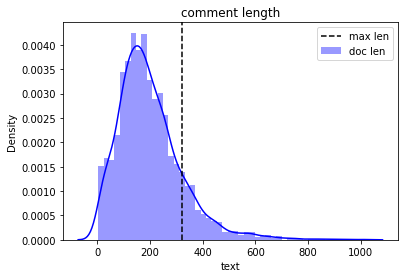

In [ ]:
sns.distplot(len, hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()

In [ ]:
# 토큰화 기준 설정
max_features = 20000 # 전체 단어들 중 토큰화시킬 단어 수 
max_len = 350 # 토큰화한 text의 vector 길이 제한 

In [ ]:
tokenizer = Tokenizer(num_words=max_features) 
tokenizer.fit_on_texts(list(data_en["text"]))

tokenized_text = tokenizer.texts_to_sequences(data_en["text"])
print(tokenized_text[0])

[40, 1117, 1427, 621, 683, 126, 22, 1, 2, 1012, 82, 126, 22, 113, 670, 89, 1967, 832, 8067, 408, 566, 16, 114, 749, 41, 311, 5, 261, 457, 5, 47, 126, 163, 18, 21, 60, 454, 152, 1, 18, 152, 1, 18, 21, 1100, 905, 943, 659, 1012, 82, 21, 621, 14, 117, 48, 64, 1012, 82, 99, 89, 10, 191, 89, 113, 3065, 136, 117, 113, 211, 3, 76, 113, 194, 3, 76, 211, 3, 76, 25, 63, 14, 48, 4058, 1, 18, 189, 67, 4, 245, 2534, 163, 18, 740, 1477, 105, 33, 29, 58, 52, 25, 63, 389, 244, 25, 63, 1005, 3, 55, 878, 40, 1878, 14, 2930, 40, 1878, 276, 277, 25, 63, 5476, 217, 1165, 28, 1630, 412, 11, 1012, 82, 53, 100, 1118, 48, 782, 64, 181, 53, 71, 97, 34, 30, 3, 741, 113, 211, 25, 63, 276, 277, 415, 71, 345, 210, 315, 180, 458, 152, 276, 3567, 104, 642, 276, 193, 265, 535, 275]


In [ ]:
data_en['tokenized_text']=tokenized_text 

In [ ]:
data_en[:5]

,Unnamed: 0,date,text,tokenized_text
0,0,2020-05-04,future asset treatment accelerate transition e...,"[40, 1117, 1427, 621, 683, 126, 22, 1, 2, 1012..."
1,1,2020-05-04,cylindrical battery mount electric vehicle dev...,"[1006, 3, 459, 1, 6, 1075, 1046, 8068, 6377, 2..."
2,2,2020-05-04,fact electric vehicle integrate state of the a...,"[386, 1, 6, 703, 180, 1601, 1066, 1497, 440, 3..."
3,3,2020-05-04,kona electric select best electric car europea...,"[278, 1, 348, 323, 1, 2, 107, 1746, 1296, 398,..."
4,4,2020-05-04,renault samsung motor say month electric vehic...,"[125, 25, 7, 19, 35, 1, 6, 1241, 887, 2038, 11..."


## padding

In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
data_en = pad_sequences(data_en["tokenized_text"], maxlen = max_len)

## modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, concatenate, Input, Flatten,  Add
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, concatenate, LeakyReLU, Softmax, MaxPool1D, MaxPooling1D
from tensorflow.keras.layers import SeparableConv1D, SpatialDropout1D, SpatialDropout2D, LocallyConnected1D
from tensorflow.keras.layers import Activation, GRU,GlobalMaxPooling1D

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #, LearningRateSchedule


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
embed_size = 350
vocab_size=20000

### GRU+CNN

In [ ]:
def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    inp_ = Embedding(vocab_size,embed_size)(inp)
    inp_ = SpatialDropout1D(dr)(inp_)

    x = Bidirectional(GRU(units, return_sequences = True))(inp_)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
    
    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)

    
    x = concatenate([avg_pool1, max_pool1])

    x = Dense(64, activation = "relu")(x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)

    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])


    model.summary()
    return model

In [ ]:
model1 = build_model(lr = 0.001, lr_d = 0, units = 112, dr = 0.3)

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 350)]        0                                            
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 350, 350)     7000000     input_15[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_40 (SpatialDr (None, 350, 350)     0           embedding_14[0][0]               
__________________________________________________________________________________________________
bidirectional_102 (Bidirectiona (None, 350, 224)     311808      spatial_dropout1d_40[0][0]       
___________________________________________________________________________________________

In [ ]:
# fitting the mdoel 
history = model1.fit(X_train, Y_train, batch_size = 128, epochs = 5, validation_data = (X_valid, Y_valid), verbose = 1 )

Epoch 1/5
176/176 [==============================] - 55s 281ms/step - loss: 0.5464 - accuracy: 0.6679 - val_loss: 0.2726 - val_accuracy: 0.8864
Epoch 2/5
176/176 [==============================] - 49s 277ms/step - loss: 0.2015 - accuracy: 0.9220 - val_loss: 0.3121 - val_accuracy: 0.8720
Epoch 3/5
176/176 [==============================] - 48s 275ms/step - loss: 0.1302 - accuracy: 0.9523 - val_loss: 0.2826 - val_accuracy: 0.8932
Epoch 4/5
176/176 [==============================] - 48s 275ms/step - loss: 0.0679 - accuracy: 0.9778 - val_loss: 0.3361 - val_accuracy: 0.8948
Epoch 5/5
176/176 [==============================] - 48s 275ms/step - loss: 0.0461 - accuracy: 0.9848 - val_loss: 0.4458 - val_accuracy: 0.8928


In [ ]:
model1.evaluate(X_test, y_test)

782/782 [==============================] - 32s 40ms/step - loss: 0.4733 - accuracy: 0.8741


[0.4732593894004822, 0.8741199970245361]

### LSTM+CNN

In [ ]:
def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    inp_ = Embedding(vocab_size,embed_size)(inp)
    inp_ = SpatialDropout1D(dr)(inp_)

    y = Bidirectional(LSTM(units, return_sequences = True))(inp_)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(y)
    
    avg_pool = GlobalAveragePooling1D()(y)
    max_pool = GlobalMaxPooling1D()(y)

    x = concatenate([avg_pool, max_pool])

    x = Dense(64, activation = "relu")(x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)

    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])


    model.summary()
    return model

In [ ]:
model2 = build_model(lr = 0.001, lr_d = 0, units = 112, dr = 0.3)

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 350)]        0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 350, 350)     7000000     input_17[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_42 (SpatialDr (None, 350, 350)     0           embedding_16[0][0]               
__________________________________________________________________________________________________
bidirectional_106 (Bidirectiona (None, 350, 224)     414848      spatial_dropout1d_42[0][0]       
___________________________________________________________________________________________

In [ ]:
# fitting the mdoel 
history = model2.fit(X_train, Y_train, batch_size = 128, epochs = 5, validation_data = (X_valid, Y_valid), verbose = 1 )

Epoch 1/5
176/176 [==============================] - 62s 290ms/step - loss: 0.5324 - accuracy: 0.6858 - val_loss: 0.2619 - val_accuracy: 0.8896
Epoch 2/5
176/176 [==============================] - 49s 281ms/step - loss: 0.1854 - accuracy: 0.9272 - val_loss: 0.2570 - val_accuracy: 0.8928
Epoch 3/5
176/176 [==============================] - 49s 281ms/step - loss: 0.1196 - accuracy: 0.9573 - val_loss: 0.2884 - val_accuracy: 0.8972
Epoch 4/5
176/176 [==============================] - 50s 283ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.3731 - val_accuracy: 0.8860
Epoch 5/5
176/176 [==============================] - 50s 286ms/step - loss: 0.0481 - accuracy: 0.9824 - val_loss: 0.4154 - val_accuracy: 0.8856


In [ ]:
model2.evaluate(X_test, y_test)

782/782 [==============================] - 38s 49ms/step - loss: 0.4556 - accuracy: 0.8683


[0.45557481050491333, 0.8682799935340881]

### ansemble model

In [ ]:
def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    inp_ = Embedding(vocab_size,embed_size)(inp)
    inp_ = SpatialDropout1D(dr)(inp_)

    x = Bidirectional(GRU(units, return_sequences = True))(inp_)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)

    x = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
    
    y = Bidirectional(LSTM(units, return_sequences = True))(inp_)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(y)

    x = SpatialDropout1D(dr)(x)

    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(y)


    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)
    
    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    
    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])

    x = Dense(64, activation = "relu")(x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)

    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])

    model.summary()
    return model

In [ ]:
model3 = build_model(lr = 0.001, lr_d = 0, units = 112, dr = 0.3)

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 350)]        0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 350, 350)     7000000     input_18[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_43 (SpatialDr (None, 350, 350)     0           embedding_17[0][0]               
__________________________________________________________________________________________________
bidirectional_108 (Bidirectiona (None, 350, 224)     311808      spatial_dropout1d_43[0][0]       
___________________________________________________________________________________________

In [ ]:
# fitting the mdoel 
history = model3.fit(X_train, Y_train, batch_size = 128, epochs = 5, validation_data = (X_valid, Y_valid), verbose = 1 )

Epoch 1/5
176/176 [==============================] - 167s 845ms/step - loss: 0.5709 - accuracy: 0.6416 - val_loss: 0.2706 - val_accuracy: 0.8916
Epoch 2/5
176/176 [==============================] - 144s 821ms/step - loss: 0.2129 - accuracy: 0.9214 - val_loss: 0.2740 - val_accuracy: 0.8980
Epoch 3/5
176/176 [==============================] - 144s 819ms/step - loss: 0.1362 - accuracy: 0.9500 - val_loss: 0.2893 - val_accuracy: 0.8928
Epoch 4/5
176/176 [==============================] - 144s 819ms/step - loss: 0.0812 - accuracy: 0.9738 - val_loss: 0.3222 - val_accuracy: 0.8952
Epoch 5/5
176/176 [==============================] - 144s 820ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.4246 - val_accuracy: 0.8868


In [ ]:
model3.evaluate(X_test, y_test)

782/782 [==============================] - 145s 185ms/step - loss: 0.4694 - accuracy: 0.8709


[0.46943485736846924, 0.8708800077438354]

### deeper model + dropout

In [ ]:
def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    inp_ = Embedding(vocab_size,embed_size)(inp)
    inp_ = SpatialDropout1D(dr)(inp_)

    x = Bidirectional(GRU(units, return_sequences = True))(inp_)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "same")(x)

    x = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "same")(x)
    
    y = Bidirectional(LSTM(units, return_sequences = True))(inp_)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "same")(y)

    x = SpatialDropout1D(dr)(x)

    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "same")(y)
    
    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)
    
    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    
    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])

    x = Dense(64, activation = "relu")(x)
    x = Dense(32, activation = "relu")(x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)

    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])


    model.summary()
    return model

In [ ]:
model4 = build_model(lr = 0.001, lr_d = 0, units = 112, dr = 0.3)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 350)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 350, 350)     7000000     input_4[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_9 (SpatialDro (None, 350, 350)     0           embedding_3[0][0]                
__________________________________________________________________________________________________
bidirectional_24 (Bidirectional (None, 350, 224)     311808      spatial_dropout1d_9[0][0]        
____________________________________________________________________________________________

In [ ]:
# fitting the mdoel 
history = model4.fit(X_train, Y_train, batch_size = 128, epochs = 5, validation_data = (X_valid, Y_valid), verbose = 1 )

Epoch 1/5
176/176 [==============================] - 126s 612ms/step - loss: 0.5892 - accuracy: 0.6254 - val_loss: 0.2664 - val_accuracy: 0.8880
Epoch 2/5
176/176 [==============================] - 103s 588ms/step - loss: 0.2200 - accuracy: 0.9183 - val_loss: 0.3085 - val_accuracy: 0.8748
Epoch 3/5
176/176 [==============================] - 103s 587ms/step - loss: 0.2018 - accuracy: 0.9254 - val_loss: 0.2499 - val_accuracy: 0.9028
Epoch 4/5
176/176 [==============================] - 103s 587ms/step - loss: 0.1174 - accuracy: 0.9587 - val_loss: 0.2704 - val_accuracy: 0.9056
Epoch 5/5
176/176 [==============================] - 103s 587ms/step - loss: 0.0937 - accuracy: 0.9656 - val_loss: 0.3360 - val_accuracy: 0.8940


In [ ]:
model4.evaluate(X_test, y_test)

782/782 [==============================] - 147s 188ms/step - loss: 0.3330 - accuracy: 0.8745


[0.33301305770874023, 0.8744800090789795]

### hyper parameter 수정

In [ ]:
def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    inp_ = Embedding(vocab_size,embed_size)(inp)
    inp_ = SpatialDropout1D(dr)(inp_)

    x = Bidirectional(GRU(units, return_sequences = True))(inp_)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "same")(x)

    x = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "same")(x)
    
    y = Bidirectional(LSTM(units, return_sequences = True))(inp_)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "same")(y)

    x = SpatialDropout1D(dr)(x)

    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "same")(y)
    
    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)
    
    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    
    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])

    x = Dense(64, activation = "relu")(x)
    x = Dense(32, activation = "relu")(x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)

    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])


    model.summary()
    return model

In [ ]:
model5 = build_model(lr = 0.0001, lr_d = 0, units = 112, dr = 0.4)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 350)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 350, 350)     7000000     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 350, 350)     0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 350, 224)     311808      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
# fitting the mdoel 
history = model5.fit(X_train, Y_train, batch_size = 32, epochs = 5, validation_data = (X_valid, Y_valid), verbose = 1 )

Epoch 1/5
704/704 [==============================] - 409s 510ms/step - loss: 0.6558 - accuracy: 0.5500 - val_loss: 0.3420 - val_accuracy: 0.8616
Epoch 2/5
704/704 [==============================] - 354s 503ms/step - loss: 0.3001 - accuracy: 0.8783 - val_loss: 0.2894 - val_accuracy: 0.8792
Epoch 3/5
704/704 [==============================] - 356s 505ms/step - loss: 0.2120 - accuracy: 0.9195 - val_loss: 0.2693 - val_accuracy: 0.8832
Epoch 4/5
704/704 [==============================] - 354s 503ms/step - loss: 0.1813 - accuracy: 0.9336 - val_loss: 0.2805 - val_accuracy: 0.8824
Epoch 5/5
704/704 [==============================] - 355s 505ms/step - loss: 0.1463 - accuracy: 0.9456 - val_loss: 0.3040 - val_accuracy: 0.8828


In [ ]:
model5.evaluate(X_test, y_test)

782/782 [==============================] - 76s 98ms/step - loss: 0.2914 - accuracy: 0.8800


[0.29137393832206726, 0.8799999952316284]

### modeling + early stopping

In [ ]:
def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    inp_ = Embedding(vocab_size,embed_size)(inp)
    inp_ = SpatialDropout1D(dr)(inp_)

    x = Bidirectional(GRU(units, return_sequences = True))(inp_)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "same")(x)

    x = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Bidirectional(GRU(units, return_sequences = True))(x)
    x = Conv1D(int(units/2), kernel_size = 3, padding = "same")(x)
    
    y = Bidirectional(LSTM(units, return_sequences = True))(inp_)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "same")(y)

    x = SpatialDropout1D(dr)(x)

    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Bidirectional(LSTM(units, return_sequences = True))(y)
    y = Conv1D(int(units/2), kernel_size = 3, padding = "same")(y)
    
    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)
    
    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    
    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])

    x = Dense(64, activation = "relu")(x)
    x = Dense(32, activation = "relu")(x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)

    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])


    model.summary()
    return model

In [ ]:
model = build_model(lr = 0.0001, lr_d = 0, units = 112, dr = 0.4)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 350)]        0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 350, 350)     7000000     input_7[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_15 (SpatialDr (None, 350, 350)     0           embedding_5[0][0]                
__________________________________________________________________________________________________
bidirectional_32 (Bidirectional (None, 350, 224)     311808      spatial_dropout1d_15[0][0]       
____________________________________________________________________________________________

In [ ]:
file_path="weights_base.best.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early = EarlyStopping(monitor="val_loss", mode="min", patience=3)

callbacks_list = [checkpoint, early] #early stopping 

In [ ]:
# fitting the mdoel 
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 20, validation_data = (X_valid, Y_valid), 
                        verbose = 1 , callbacks=callbacks_list)
model.load_weights(file_path)

Epoch 1/20
704/704 [==============================] - 211s 287ms/step - loss: 0.6685 - accuracy: 0.5463 - val_loss: 0.3617 - val_accuracy: 0.8404

Epoch 00001: val_loss improved from inf to 0.36169, saving model to weights_base.best.hdf5
Epoch 2/20
704/704 [==============================] - 200s 284ms/step - loss: 0.2804 - accuracy: 0.8841 - val_loss: 0.2723 - val_accuracy: 0.8836

Epoch 00002: val_loss improved from 0.36169 to 0.27229, saving model to weights_base.best.hdf5
Epoch 3/20
704/704 [==============================] - 200s 285ms/step - loss: 0.1931 - accuracy: 0.9258 - val_loss: 0.2714 - val_accuracy: 0.8908

Epoch 00003: val_loss improved from 0.27229 to 0.27144, saving model to weights_base.best.hdf5
Epoch 4/20
704/704 [==============================] - 200s 284ms/step - loss: 0.1514 - accuracy: 0.9451 - val_loss: 0.2791 - val_accuracy: 0.8944

Epoch 00004: val_loss did not improve from 0.27144
Epoch 5/20
704/704 [==============================] - 200s 284ms/step - loss: 0.

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 77s 98ms/step - loss: 0.4793 - accuracy: 0.8851


[0.47932150959968567, 0.8851199746131897]

## predict

In [ ]:
def sentiment_predict(score): # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 text입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 text입니다.\n".format((1 - score) * 100))
  return score

In [ ]:
preds = []
score=model.predict(X_news).flatten()
for sentence in score:
    preds.append(sentence)

In [ ]:
data_en['sentimental']=preds

In [ ]:
data_en

,Unnamed: 0,date,text,tokenized_text,sentimental
0,0,2020-05-04,future asset treatment accelerate transition e...,"[40, 1117, 1427, 621, 683, 126, 22, 1, 2, 1012...",0.935793
1,1,2020-05-04,cylindrical battery mount electric vehicle dev...,"[1006, 3, 459, 1, 6, 1075, 1046, 8068, 6377, 2...",0.001325
2,2,2020-05-04,fact electric vehicle integrate state of the a...,"[386, 1, 6, 703, 180, 1601, 1066, 1497, 440, 3...",0.878179
3,3,2020-05-04,kona electric select best electric car europea...,"[278, 1, 348, 323, 1, 2, 107, 1746, 1296, 398,...",0.000161
4,4,2020-05-04,renault samsung motor say month electric vehic...,"[125, 25, 7, 19, 35, 1, 6, 1241, 887, 2038, 11...",0.964481
...,...,...,...,...,...
2538,2538,2020-11-02,give payment high priced electric vehicles dis...,"[540, 462, 49, 2952, 1, 18, 3123, 43, 4, 133, ...",0.465339
2539,2539,2020-11-02,president moon jae in president hyundai motor ...,"[62, 499, 340, 367, 62, 8, 7, 586, 52, 143, 20...",0.036400
2540,2540,2020-11-02,government establish expiration electric vehic...,"[59, 109, 1187, 1, 18, 60, 84, 1, 18, 425, 114...",0.321738
2541,2541,2020-11-02,ministry land land transportation open regulat...,"[102, 399, 399, 514, 312, 685, 42, 1022, 705, ...",0.933650


In [ ]:
data_sentiment=data_en.groupby('date').mean()
data_sentiment

,sentimental
date,
2020-05-04,0.348374
2020-05-06,0.126597
2020-05-07,0.261125
2020-05-08,0.622095
2020-05-11,0.310098
...,...
2020-10-27,0.293896
2020-10-28,0.317421
2020-10-29,0.268324


In [ ]:
data_sentiment.to_csv(r"/content/drive/MyDrive/data_sentiment.csv")

# 3) 주가변동 분석

In [ ]:
data = {'hyundai' : '005380.KS', 'kia' : '000270.KS', 'lg' : '051910.KS', 'samsung' : '006400.KS', 'sk' : '096770.KS', 'posco' : '003670.KS'}

data_raw = {}
for firm, code in data.items() : 
    data_raw[firm] = yf.download(code, start='2020-04-29', end='2021-05-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#주가 변동
from datetime import datetime

df_new = {}
for firm in data.keys() : 
    df_new[firm] = pd.DataFrame()
    df_new[firm]['Ret'] = data_raw[firm]['Close'].pct_change()
    df_new[firm]['Ret'] = np.sign(df_new[firm]['Ret'])
    df_new[firm].drop([datetime(2020, 4, 29)], axis=0, inplace=True)
df_new

{'hyundai':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07 -1.0
 2020-05-08  1.0
 2020-05-11 -1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27 -1.0
 2021-04-28  1.0
 2021-04-29 -1.0
 2021-04-30 -1.0
 
 [248 rows x 1 columns], 'kia':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07 -1.0
 2020-05-08  1.0
 2020-05-11  1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27 -1.0
 2021-04-28 -1.0
 2021-04-29 -1.0
 2021-04-30 -1.0
 
 [248 rows x 1 columns], 'lg':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07 -1.0
 2020-05-08 -1.0
 2020-05-11 -1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27  1.0
 2021-04-28 -1.0
 2021-04-29  1.0
 2021-04-30 -1.0
 
 [248 rows x 1 columns], 'posco':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07  1.0
 2020-05-08  1.0
 2020-05-11 -1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27 -1.0
 2021-04-28 -1.0
 2021-04-29 -1.0
 2021-04-30 -1.0
 
 [2

In [ ]:
#기업 별로 feature 불러오기
X = pd.read_csv("/content/drive/MyDrive/timeseries+sentiment.csv", sep=",")
X.index = X['date']
X.drop(['date'], axis=1, inplace=True)

# 4) RandomForest

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 8.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=4b14c4bcb7801859700c9abcbf5f850330c8423c1ae1398e2eebe95f2c633657
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import yfinance  as yf

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## lagged 변수 추가

In [ ]:
X['sentimetal_t-1']=X.sentimental.shift()
X['sentimetal_t-2']=X.sentimental.shift(2)
X['sentimetal_t-3']=X.sentimental.shift(3)
X=X.fillna(0.5)
X

,hyundai,kia,lg,samsung,sk,posco,news_num,search_vol,sentimental,sentimetal_t-1,sentimetal_t-2,sentimetal_t-3
date,,,,,,,,,,,,
2020-05-04,0,0,1,1,0,0,10,20692,0.348374,0.500000,0.500000,0.500000
2020-05-06,14,0,0,1,0,0,18,10583,0.126597,0.348374,0.500000,0.500000
2020-05-07,5,0,6,1,0,0,14,4945,0.261125,0.126597,0.348374,0.500000
2020-05-08,0,0,4,0,0,0,6,4789,0.622095,0.261125,0.126597,0.348374
2020-05-11,16,1,1,0,0,0,26,17325,0.310098,0.622095,0.261125,0.126597
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,7,0,0,0,0,1,50,20640,0.300549,0.325474,0.397458,0.588395
2021-04-27,1,1,1,5,0,0,46,6551,0.176617,0.300549,0.325474,0.397458
2021-04-28,2,0,0,2,2,6,24,6317,0.308413,0.176617,0.300549,0.325474


In [ ]:
#해당 기업 뉴스 개수 퍼센트로 변경
for firm in data.keys() :
    X[firm] = X.apply(lambda x: x[firm]/x['news_num'], axis=1)
X

,hyundai,kia,lg,samsung,sk,posco,news_num,search_vol,sentimental,sentimetal_t-1,sentimetal_t-2,sentimetal_t-3
date,,,,,,,,,,,,
2020-05-04,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,10,20692,0.348374,0.500000,0.500000,0.500000
2020-05-06,0.777778,0.000000,0.000000,0.055556,0.000000,0.000000,18,10583,0.126597,0.348374,0.500000,0.500000
2020-05-07,0.357143,0.000000,0.428571,0.071429,0.000000,0.000000,14,4945,0.261125,0.126597,0.348374,0.500000
2020-05-08,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,6,4789,0.622095,0.261125,0.126597,0.348374
2020-05-11,0.615385,0.038462,0.038462,0.000000,0.000000,0.000000,26,17325,0.310098,0.622095,0.261125,0.126597
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,0.140000,0.000000,0.000000,0.000000,0.000000,0.020000,50,20640,0.300549,0.325474,0.397458,0.588395
2021-04-27,0.021739,0.021739,0.021739,0.108696,0.000000,0.000000,46,6551,0.176617,0.300549,0.325474,0.397458
2021-04-28,0.083333,0.000000,0.000000,0.083333,0.083333,0.250000,24,6317,0.308413,0.176617,0.300549,0.325474


In [ ]:
data_time = {}
col={}
for firm in data.keys() :
    data_time[firm] = pd.DataFrame()
    data_time[firm] = X.loc[:, ['sentimental','sentimetal_t-1','sentimetal_t-2','sentimetal_t-3','search_vol', 'news_num', firm]]
    data_time[firm] = pd.DataFrame(data_time[firm])
    col[firm]=data_time[firm].columns

data_time

{'hyundai':             sentimental  sentimetal_t-1  ...  news_num   hyundai
 date                                     ...                    
 2020-05-04     0.348374        0.500000  ...        10  0.000000
 2020-05-06     0.126597        0.348374  ...        18  0.777778
 2020-05-07     0.261125        0.126597  ...        14  0.357143
 2020-05-08     0.622095        0.261125  ...         6  0.000000
 2020-05-11     0.310098        0.622095  ...        26  0.615385
 ...                 ...             ...  ...       ...       ...
 2021-04-26     0.300549        0.325474  ...        50  0.140000
 2021-04-27     0.176617        0.300549  ...        46  0.021739
 2021-04-28     0.308413        0.176617  ...        24  0.083333
 2021-04-29     0.512079        0.308413  ...        36  0.027778
 2021-04-30     0.140062        0.512079  ...        42  0.047619
 
 [248 rows x 7 columns],
 'kia':             sentimental  sentimetal_t-1  ...  news_num       kia
 date                          

In [ ]:
data_time['kia']

,sentimental,sentimetal_t-1,sentimetal_t-2,sentimetal_t-3,search_vol,news_num,kia
date,,,,,,,
2020-05-04,0.348374,0.500000,0.500000,0.500000,20692,10,0.000000
2020-05-06,0.126597,0.348374,0.500000,0.500000,10583,18,0.000000
2020-05-07,0.261125,0.126597,0.348374,0.500000,4945,14,0.000000
2020-05-08,0.622095,0.261125,0.126597,0.348374,4789,6,0.000000
2020-05-11,0.310098,0.622095,0.261125,0.126597,17325,26,0.038462
...,...,...,...,...,...,...,...
2021-04-26,0.300549,0.325474,0.397458,0.588395,20640,50,0.000000
2021-04-27,0.176617,0.300549,0.325474,0.397458,6551,46,0.021739
2021-04-28,0.308413,0.176617,0.300549,0.325474,6317,24,0.000000


## scaling

In [ ]:
for firm in data.keys() :
    print(data_time[firm].shape)

(248, 7)
(248, 7)
(248, 7)
(248, 7)
(248, 7)
(248, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
for firm in data.keys() :
    data_time[firm]=scaler.fit_transform(data_time[firm])

## 변수 중요도 분석

In [ ]:
xtrain = {}; xtest = {}; ytrain = {}; ytest = {} 

for firm in data.keys() :
    xtrain[firm], xtest[firm], ytrain[firm], ytest[firm] = train_test_split(data_time[firm], df_new[firm]['Ret'], random_state=29)

In [ ]:
forest_model = {}
for firm in data.keys() :
    forest_model[firm] = RandomForestClassifier(random_state=29)  # instantiation
    forest_model[firm].fit(xtrain[firm], ytrain[firm])  # fitting

In [ ]:
for firm in data.keys() :
    print(firm, accuracy_score(ytest[firm], forest_model[firm].predict(xtest[firm])))

hyundai 0.5
kia 0.532258064516129
lg 0.45161290322580644
samsung 0.5645161290322581
sk 0.5483870967741935
posco 0.4838709677419355


Text(0.5, 1.0, 'Feature Importance')

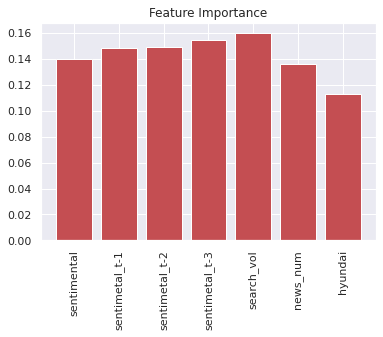

In [ ]:
# plot feature importance - hyundai
feature_imp = forest_model['hyundai'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), col['hyundai'], rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

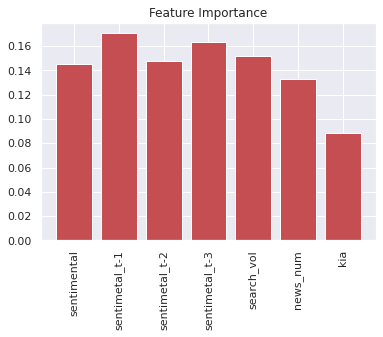

In [ ]:
# plot feature importance - kia
feature_imp = forest_model['kia'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), col['kia'], rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

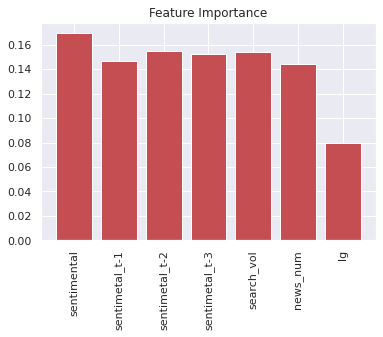

In [ ]:
# plot feature importance - lg
feature_imp = forest_model['lg'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), col['lg'], rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

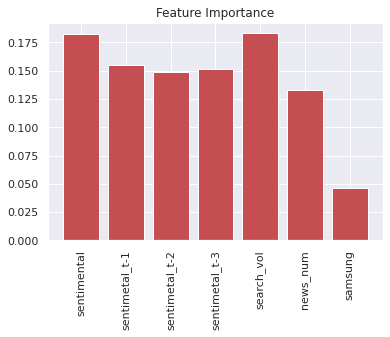

In [ ]:
# plot feature importance - samsung
feature_imp = forest_model['samsung'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), col['samsung'], rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

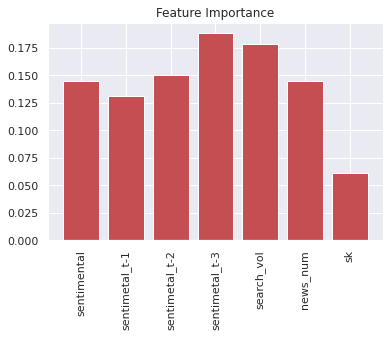

In [ ]:
# plot feature importance - sk
feature_imp = forest_model['sk'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), col['sk'], rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

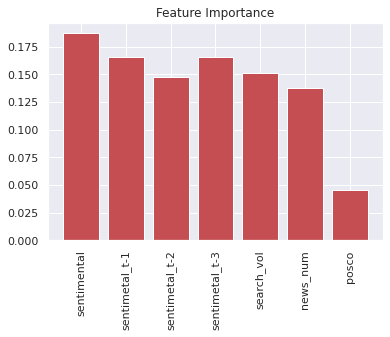

In [ ]:
# plot feature importance - posco
feature_imp = forest_model['posco'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), col['posco'], rotation='vertical')
plt.title('Feature Importance')

## GridSearch 적용

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

forest_parameters = [{"n_estimators" : [2, 4, 8, 16, 32], "criterion" : ["gini","entropy"],'max_depth' : [2, 4, 6, 8, 10], 
                      "min_samples_leaf" : [2, 4, 6, 8, 10], "random_state":[29]}]

In [ ]:

best_forest_parameters = {}
best_score = {}

xtrain = {}; xtest = {}; ytrain = {}; ytest = {} 
for firm in data.keys() :
    xtrain[firm], xtest[firm], ytrain[firm], ytest[firm] = train_test_split(data_time[firm], df_new[firm]['Ret'], random_state=29)

for firm in data.keys() :
    forest_grid = GridSearchCV(estimator = RandomForestClassifier(random_state=29), param_grid = forest_parameters, scoring ="accuracy", cv=5, n_jobs=1)
    forest_grid_result = forest_grid.fit(xtrain[firm], ytrain[firm])
    best_forest_parameters[firm] = forest_grid_result.best_params_
    best_score[firm] = forest_grid_result.best_score_
    print(firm, accuracy_score(ytest[firm], forest_grid_result.predict(xtest[firm])))
    print(best_score[firm])
    print(best_forest_parameters[firm]) ##{'criterion': 'entropy', 'min_samples_leaf': 10, 'n_estimators': 2, 'random_state': 1}

hyundai 0.5161290322580645
0.5588904694167852
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 2, 'random_state': 29}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


kia 0.46774193548387094
0.5593172119487908
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 32, 'random_state': 29}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


lg 0.532258064516129
0.5591749644381223
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 2, 'random_state': 29}
samsung 0.6612903225806451
0.5539118065433855
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 32, 'random_state': 29}
sk 0.5483870967741935
0.5314366998577525
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 6, 'n_estimators': 4, 'random_state': 29}
posco 0.46774193548387094
0.5917496443812233
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'n_estimators': 2, 'random_state': 29}


In [ ]:
forest_model = {}
for firm in data.keys() :
    forest_model[firm] = RandomForestClassifier(n_estimators = best_forest_parameters[firm]["n_estimators"], criterion = best_forest_parameters[firm]["criterion"],
                                     max_depth = best_forest_parameters[firm]["max_depth"], min_samples_leaf = best_forest_parameters[firm]["min_samples_leaf"], random_state = 29)
    forest_model[firm].fit(xtrain[firm], ytrain[firm])

In [ ]:
for firm in data.keys() :
    print(firm, accuracy_score(ytest[firm], forest_model[firm].predict(xtest[firm])))

hyundai 0.5161290322580645
kia 0.46774193548387094
lg 0.532258064516129
samsung 0.6612903225806451
sk 0.5483870967741935
posco 0.46774193548387094
